In [ ]:
# 21 mar 2025

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [134]:
df = pd.read_csv('daily-min-temperatures.xls', parse_dates=["Date"])

In [135]:
# //
df.head(2)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9


In [136]:
df['t'] = df['Temp'].shift(1)

In [137]:
# //
df['t']

0        NaN
1       20.7
2       17.9
3       18.8
4       14.6
        ... 
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, Length: 3650, dtype: float64

In [138]:
df['Resid'] = df['Temp'] - df['t']

In [139]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [140]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [141]:
# //
print(train)

           Date  Temp     t  Resid
1    1981-01-02  17.9  20.7   -2.8
2    1981-01-03  18.8  17.9    0.9
3    1981-01-04  14.6  18.8   -4.2
4    1981-01-05  15.8  14.6    1.2
5    1981-01-06  15.8  15.8    0.0
...         ...   ...   ...    ...
3638 1990-12-20  15.4  14.7    0.7
3639 1990-12-21  13.1  15.4   -2.3
3640 1990-12-22  13.2  13.1    0.1
3641 1990-12-23  13.9  13.2    0.7
3642 1990-12-24  10.0  13.9   -3.9

[3642 rows x 4 columns]


In [142]:
train_X, train_y = train['t'], train['Temp']
train_X, test_y = test['Resid'], test['Temp']  # check this line

In [143]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [144]:
# //
train, train.shape

(1      -2.8
 2       0.9
 3      -4.2
 4       1.2
 5       0.0
        ... 
 3638    0.7
 3639   -2.3
 3640    0.1
 3641    0.7
 3642   -3.9
 Name: Resid, Length: 3642, dtype: float64,
 (3642,))

In [145]:
# //
test, test.shape

(3643    2.9
 3644    1.7
 3645   -0.6
 3646   -0.4
 3647   -0.1
 3648    2.2
 3649   -2.7
 Name: Resid, dtype: float64,
 (7,))

In [146]:
train.shape

(3642,)

In [147]:
model=AutoReg(train,lags=10)

In [148]:
# //
model

In [149]:
model_fit = model.fit()

In [178]:
pred_resid = model_fit.predict(start=len(train), end=(len(train)+len(test)-2))

In [166]:
# //
start=len(train)
start

3642

In [170]:
len(train) 

3642

In [167]:
# //

end=len(train)+len(test)-1
end

3648

In [119]:
# //
print(len(test)-1)

6


In [120]:
len(test) #

7

In [121]:
len(train) #

3642

In [208]:
pred_resid = model_fit.predict(start=len(train)+len(test)-1, end=len(train)+len(test)-1) ## 
pred_resid

3649   -0.140112
dtype: float64

In [207]:
start=len(train)+len(test)-1 ##
start

3648

In [124]:
end ##

3642

In [179]:
pred_resid

3643    1.296514
3644    0.519072
3645   -0.053491
3646    0.040144
3647   -0.184500
3648         NaN
dtype: float64

In [104]:
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [45]:
predictions = df.t[df.shape[0]-7:] + pred_resid

In [46]:
predictions

3643    11.296514
3644    13.419072
3645    14.546509
3646    14.040144
3647    13.415500
3648    13.359888
3649          NaN
dtype: float64

In [53]:
# Note: 
# always verify the shape 
# before applying the rmse

In [54]:
test_y.shape

(7,)

In [57]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_y, predictions))
rmse

ValueError: Input contains NaN.

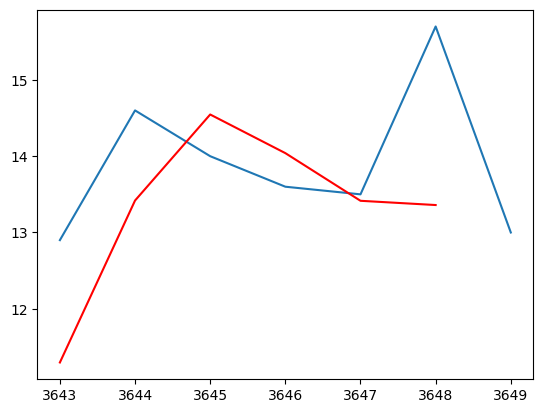

In [202]:
plt.plot(test_y)
plt.plot(predictions, color='red')

In [ ]:
# Rough

In [185]:
pred_resid = model_fit.predict(start=len(train), end=(len(train)+len(test)-1))

In [186]:
pred_resid

3643    1.296514
3644    0.519072
3645   -0.053491
3646    0.040144
3647   -0.184500
3648   -0.140112
3649         NaN
dtype: float64

In [188]:
pred_resid = model_fit.predict(start=len(train), end=(len(train)+len(test)+1))
pred_resid

3643    1.296514
3644    0.519072
3645   -0.053491
3646    0.040144
3647   -0.184500
3648   -0.140112
3649   -0.117943
3650   -0.135275
3651         NaN
dtype: float64

In [196]:
pred_resid = model_fit.predict(3642, 3748)
pred_resid

3643    1.296514
3644    0.519072
3645   -0.053491
3646    0.040144
3647   -0.184500
          ...   
3745   -0.001247
3746   -0.001247
3747   -0.001247
3748   -0.001247
3749         NaN
Length: 107, dtype: float64

In [197]:
pred_resid = model_fit.predict(3642, 3749)
pred_resid

3643    1.296514
3644    0.519072
3645   -0.053491
3646    0.040144
3647   -0.184500
          ...   
3746   -0.001247
3747   -0.001247
3748   -0.001247
3749   -0.001247
3750         NaN
Length: 108, dtype: float64

In [200]:
pred_resid = model_fit.predict(36440, 3749)
pred_resid

ValueError: Prediction must have `end` after `start`.